## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the acute nephritis dataset loaded below and analyze the model generated for this datasett.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ds_useful as ds

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [2]:
# columns: 
# Temperature of patient { 35C-42C }
# Occurrence of nausea { yes, no }
# Lumbar pain { yes, no }
# Urine pushing (continuous need for urination) { yes, no }
# Micturition pains { yes, no }
# Burning of urethra, itch, swelling of urethra outlet { yes, no }
# decision: Nephritis of renal pelvis origin { yes, no } 

cols = ['temp', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning', 'nephritis']
nephritis = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/acute.csv', names=cols)

In [3]:
nephritis.head()

,temp,nausea,lumbar_pain,urine_pushing,micturition_pains,burning,nephritis
35,5,no,yes,no,no,no,no
35,9,no,no,yes,yes,yes,no
35,9,no,yes,no,no,no,no
36,0,no,no,yes,yes,yes,no
36,0,no,yes,no,no,no,no


First, check for missing data and remove all rows containing missing data

In [4]:
# answer below:

ds.missingness_summary(nephritis)

nephritis            0.0
burning              0.0
micturition_pains    0.0
urine_pushing        0.0
lumbar_pain          0.0
nausea               0.0
temp                 0.0
dtype: float64

To use the data, we must convert all columns to numeric. Do this using the `get_dummies` function for all non-numeric columns.

Note: remember to drop the first value.

In [5]:
# answer below:

nephritis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 35 to 41
Data columns (total 7 columns):
temp                 120 non-null int64
nausea               120 non-null object
lumbar_pain          120 non-null object
urine_pushing        120 non-null object
micturition_pains    120 non-null object
burning              120 non-null object
nephritis            120 non-null object
dtypes: int64(1), object(6)
memory usage: 10.0+ KB


In [7]:
obj_columns = nephritis.select_dtypes('object').columns
non_obj_columns = nephritis.drop(obj_columns, axis=1).columns
dums = pd.get_dummies(nephritis[obj_columns], drop_first=True)
feat_neph = pd.concat([dums, nephritis[non_obj_columns]], axis=1)
feat_neph

,nausea_yes,lumbar_pain_yes,urine_pushing_yes,micturition_pains_yes,burning_yes,nephritis_yes,temp
35,0,1,0,0,0,0,5
35,0,0,1,1,1,0,9
35,0,1,0,0,0,0,9
36,0,0,1,1,1,0,0
36,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
41,0,1,1,0,1,1,4
41,0,0,0,0,0,0,5
41,1,1,0,1,0,1,5
41,0,1,1,0,1,1,5


Split the data into train and test. Use 20% of the data for our test subset. Use nephritis as the target variable.

In [10]:
# answer below:

from sklearn.model_selection import train_test_split

X = feat_neph.drop('nephritis_yes', axis=1)
y = feat_neph['nephritis_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Generate a KNN model with k=5 for the dataset.  What is the accuracy score for the train and test subsamples?

In [11]:
# answer below:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

1.0

Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [0]:
# answer below:

print('I wouln\'t say the model overfits, because I was scoring the test set, not the training set. It is however almost suspiciously accurate')

Let's optimize k. Produce a plot with training and testing accuracy for a wide range of k.

In [15]:
# answer below:

train_scores = []
test_scores = []

k_list = [1, 3, 5, 7, 9, 11, 31, 51, 71, 91]

for k in k_list:
    neighbors = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neighbors.fit(X_train, y_train)
    train_scores.append(neighbors.score(X_train, y_train))
    test_scores.append(neighbors.score(X_test, y_test))

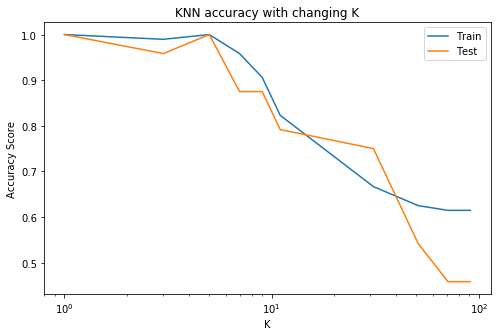

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(k_list, train_scores, label='Train')
plt.plot(k_list, test_scores, label='Test')
plt.legend()
plt.title('KNN accuracy with changing K')
plt.xscale('log')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()